In [101]:
import os
import glob

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np 
import rasterio 
import xarray

In [112]:
filepath = '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/'

filesPreFire = sorted(glob.glob(filepath + 'LandsatPreFire/*.TIF')) 
filesPostFire = sorted(glob.glob(filepath + 'LandsatPostFire/*.TIF'))
filesFire = sorted(glob.glob(filepath + 'Landsat10_03_Fire/*.TIF'))
filesRecent = sorted(glob.glob(filepath + 'Landsat_Feb11_2022/*.TIF'))


print(filesPreFire)
print(filesPostFire)
print(filesFire)
print(filesRecent)

['/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B1.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B2.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B3.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B4.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B5.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B6.TIF', '/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPreFire/LC08_L2SP_045029_20200901_20200906_02_T1_SR_B7.TIF']
['/Users/isaiastorres/Desktop/GEOG490/ProjectData/Landsat/LandsatPostFire/LC08_L2SP_045029_20201120_20210315_02_T1_SR_B1.TIF

In [105]:
list_bandsPreFire = [] 
for file in filesPreFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsPreFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsPreFire = np.dstack(list_bandsPreFire)

In [106]:
all_bands_imagePreFire = np.uint8((all_bandsPreFire / 65536) * 255)

In [107]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviPreFire = np.divide((all_bandsPreFire[:,:,4].astype(float) - all_bandsPreFire[:,:,3].astype(float)), \
                 (all_bandsPreFire[:,:,4].astype(float) + all_bandsPreFire[:,:,3].astype(float)))

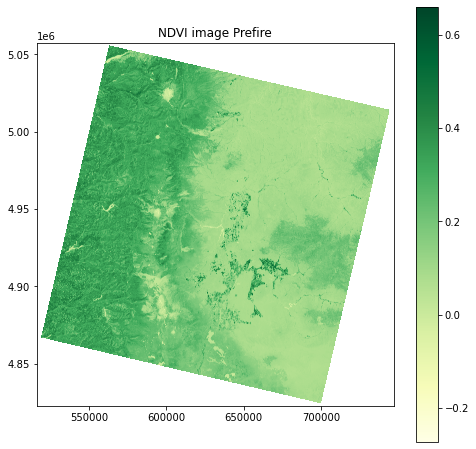

In [153]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPreFire, extent=full_extent, cmap = 'YlGn')
ax.set_title("NDVI image Prefire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [109]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrPreFire = np.divide((all_bandsPreFire[:,:,4].astype(float) - all_bandsPreFire[:,:,6].astype(float)), \
                 (all_bandsPreFire[:,:,4].astype(float) + all_bandsPreFire[:,:,6].astype(float)))

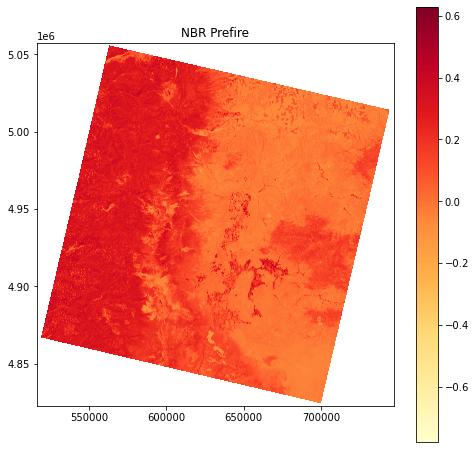

In [154]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPreFire, extent=full_extent, cmap = 'YlOrRd')
ax.set_title("NBR Prefire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [113]:
list_bandsFire = [] 
for file in filesFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsFire = np.dstack(list_bandsFire)

In [114]:
all_bands_imageFire = np.uint8((all_bandsFire / 65536) * 255)

In [115]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviFire = np.divide((all_bandsFire[:,:,4].astype(float) - all_bandsFire[:,:,3].astype(float)), \
                 (all_bandsFire[:,:,4].astype(float) + all_bandsFire[:,:,3].astype(float)))

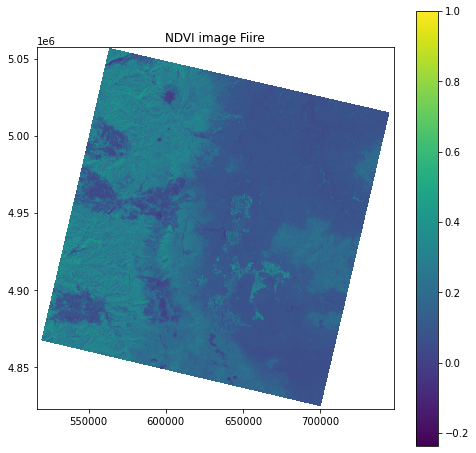

In [116]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviFire, extent=full_extent)
ax.set_title("NDVI image Fiire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [117]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrFire = np.divide((all_bandsFire[:,:,4].astype(float) - all_bandsFire[:,:,6].astype(float)), \
                 (all_bandsFire[:,:,4].astype(float) + all_bandsFire[:,:,6].astype(float)))

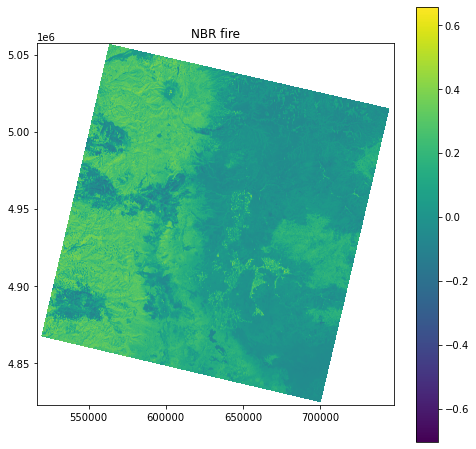

In [118]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrFire, extent=full_extent)
ax.set_title("NBR fire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [119]:
list_bandsPostFire = [] 
for file in filesPostFire:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsPostFire.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsPostFire = np.dstack(list_bandsPostFire)

In [120]:
all_bands_imagePostFire = np.uint8((all_bandsPostFire / 65536) * 255)

In [121]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviPostFire = np.divide((all_bandsPostFire[:,:,4].astype(float) - all_bandsPostFire[:,:,3].astype(float)), \
                 (all_bandsPostFire[:,:,4].astype(float) + all_bandsPostFire[:,:,3].astype(float)))

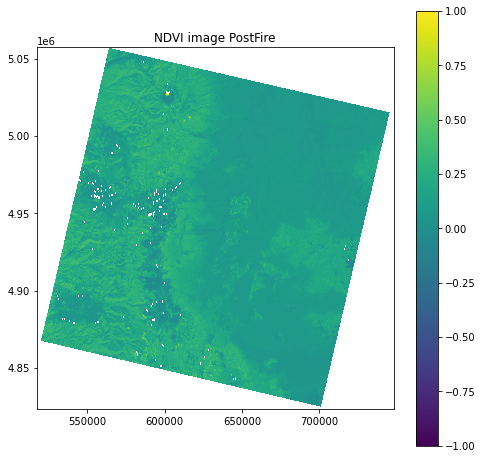

In [122]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPostFire, extent=full_extent)
ax.set_title("NDVI image PostFire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [123]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrPostFire = np.divide((all_bandsPostFire[:,:,4].astype(float) - all_bandsPostFire[:,:,6].astype(float)), \
                 (all_bandsPostFire[:,:,4].astype(float) + all_bandsPostFire[:,:,6].astype(float)))

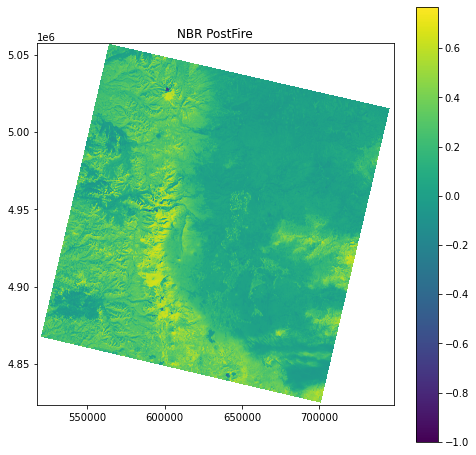

In [124]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPostFire, extent=full_extent)
ax.set_title("NBR PostFire")
fig.colorbar(im, orientation='vertical')
plt.show()

In [125]:
list_bandsRecent = [] 
for file in filesRecent:
# Read band
    src = rasterio.open(file) 
    band = src.read(1)
             # Append to list
    list_bandsRecent.append(band)
         # Convert from list of arrays to n-dimensional array
all_bandsRecent = np.dstack(list_bandsRecent)

In [126]:
all_bands_imageRecent = np.uint8((all_bandsRecent / 65536) * 255)

In [127]:
# Compute NDVI
np.seterr(divide='ignore', invalid='ignore')
ndviRecent = np.divide((all_bandsRecent[:,:,4].astype(float) - all_bandsRecent[:,:,3].astype(float)), \
                 (all_bandsRecent[:,:,4].astype(float) + all_bandsRecent[:,:,3].astype(float)))

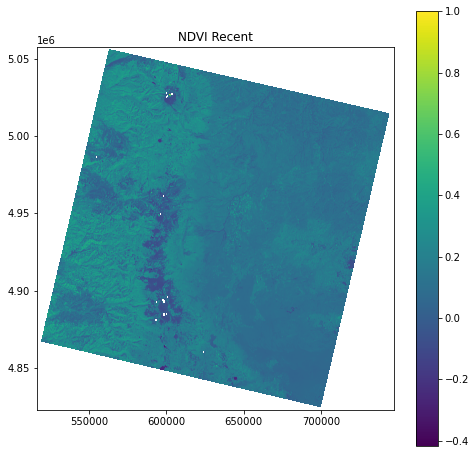

In [128]:
# Plot NDVI image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviRecent, extent=full_extent)
ax.set_title("NDVI Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [129]:
# Compute NBR
np.seterr(divide='ignore', invalid='ignore')
nbrRecent = np.divide((all_bandsRecent[:,:,4].astype(float) - all_bandsRecent[:,:,6].astype(float)), \
                 (all_bandsRecent[:,:,4].astype(float) + all_bandsRecent[:,:,6].astype(float)))

In [133]:
src.bounds.left

515985.0

In [134]:
help(ax.imshow)

Help on method imshow in module matplotlib.axes._axes:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can 

In [137]:
nbrRecent

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

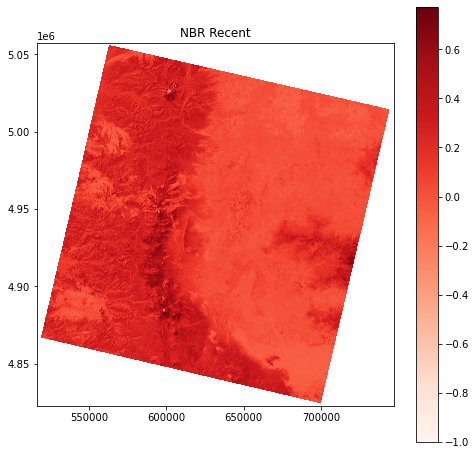

In [135]:
# Plot NBR image
full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, extent=full_extent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

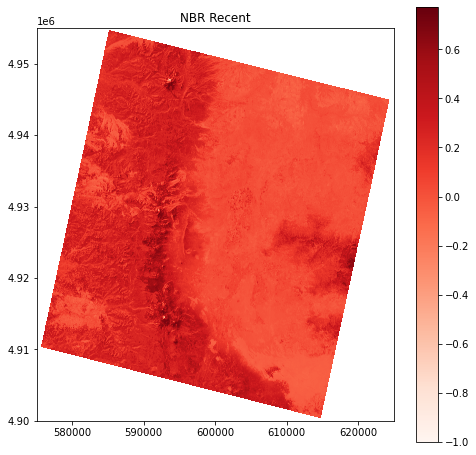

In [132]:
# Plot NBR image
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, extent=zoom_extent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

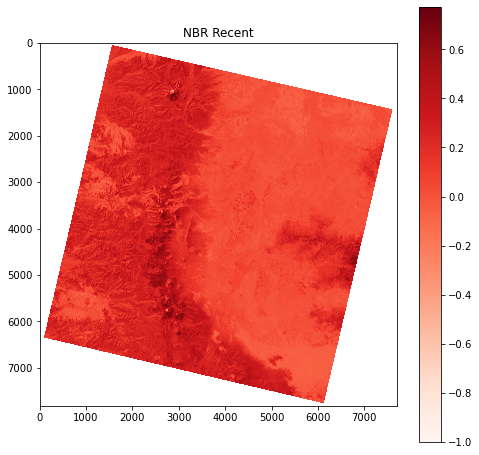

In [139]:
# Plot NBR image
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecent, cmap = 'Reds')
ax.set_title("NBR Recent")
fig.colorbar(im, orientation='vertical')
plt.show()

In [141]:
nbrRecent[3000:5000, 2000:4000]

array([[ 0.20232382,  0.1982482 ,  0.1798084 , ..., -0.06577626,
        -0.02905397,  0.0152439 ],
       [ 0.18131116,  0.17224804,  0.15095068, ..., -0.01458671,
         0.02416821,  0.01766724],
       [ 0.12996778,  0.11214195,  0.09201286, ...,  0.03705513,
         0.02985464,  0.0221219 ],
       ...,
       [ 0.35285077,  0.26794341,  0.00651289, ...,  0.01109522,
         0.01530729,  0.01182508],
       [ 0.34121343,  0.26599928,  0.00643065, ...,  0.01351508,
         0.01269829,  0.00292149],
       [ 0.3644011 ,  0.17707952,  0.00487013, ...,  0.01128668,
         0.01505571,  0.01940352]])

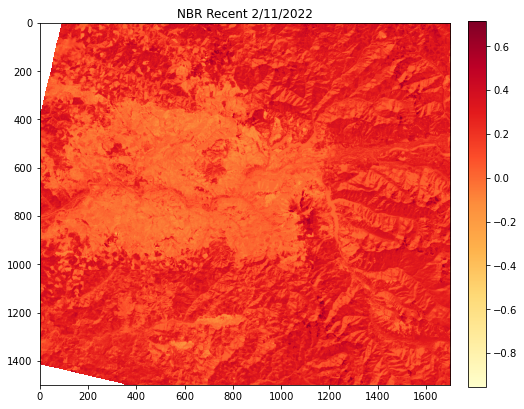

In [195]:
#mat_row_index = (3000:6000)#range(3000, 6000)
#mat_col_index = (2000:4000)#range(2000, 4000)
# Plot NBR image
nbrRecentcrop = nbrRecent[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrRecentcrop, cmap = 'YlOrRd')
ax.set_title("NBR Recent 2/11/2022")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

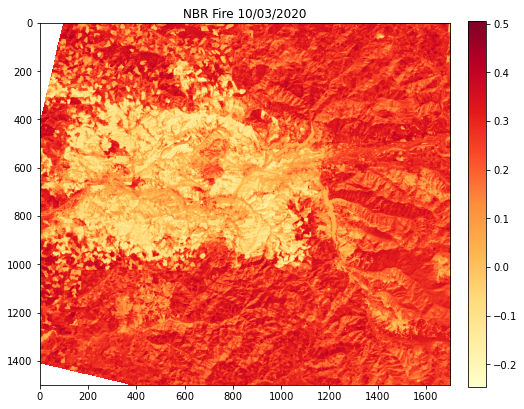

In [194]:
nbrFirecrop = nbrFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrFirecrop, cmap = 'YlOrRd')
ax.set_title("NBR Fire 10/03/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

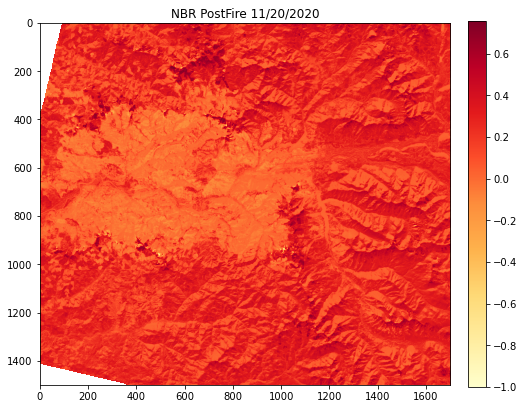

In [193]:
nbrPostFirecrop = nbrPostFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPostFirecrop, cmap = 'YlOrRd')
ax.set_title("NBR PostFire 11/20/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

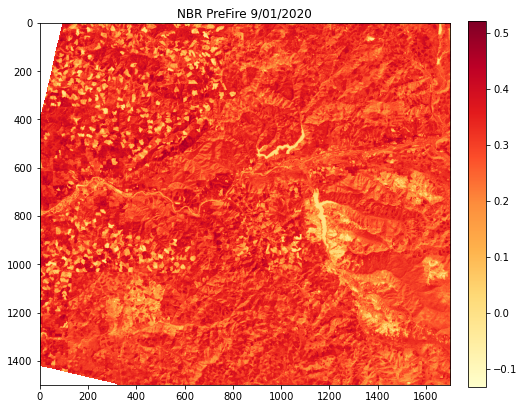

In [192]:
nbrPreFirecrop = nbrPreFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(nbrPreFirecrop, cmap = 'YlOrRd', )
ax.set_title("NBR PreFire 9/01/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

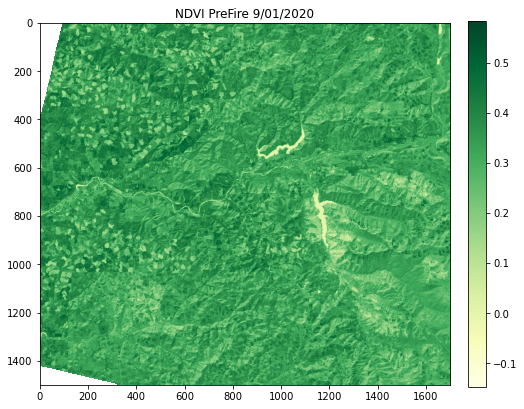

In [186]:
ndviPreFirecrop = ndviPreFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPreFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Pre-Fire 9/01/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

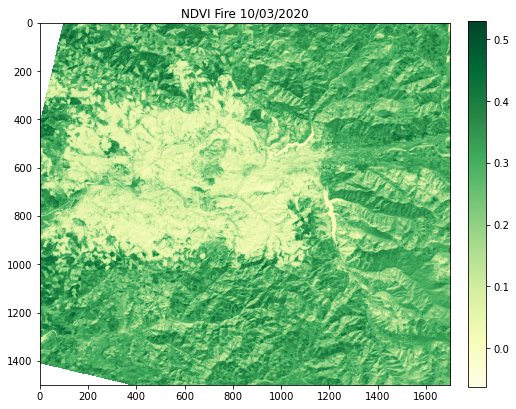

In [187]:
ndviFirecrop = ndviFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Fire 10/03/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

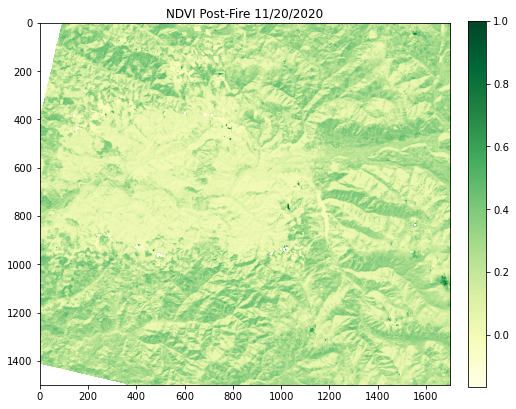

In [189]:
ndviPostFirecrop = ndviPostFire[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviPostFirecrop, cmap = 'YlGn')
ax.set_title("NDVI Post-Fire 11/20/2020")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)
plt.show()

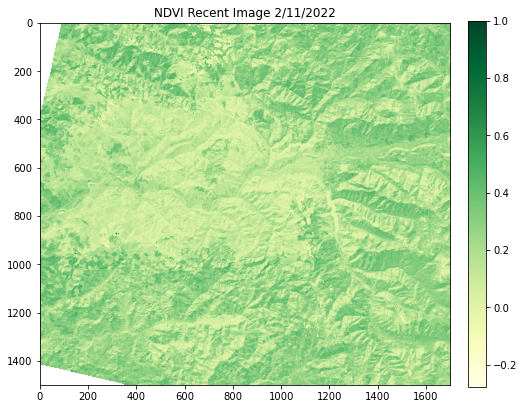

In [190]:
ndviRecentcrop = ndviRecent[5000:6500, 300:2000]
#full_extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]
zoom_extent = [5.75e5, 6.25e5, 4.9e6, 4.955e6]
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(ndviRecentcrop, cmap = 'YlGn')
ax.set_title("NDVI Recent Image 2/11/2022")
fig.colorbar(im, orientation='vertical',fraction=0.041, pad=0.04)

plt.show()
